In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report,confusion_matrix

# 設定表格顯示寬度
pd.set_option('max_columns',30)
pd.set_option('max_rows',1000)
#設定能顯示全部array的結果
np.set_printoptions(threshold=np.inf)

# 匯入檔案並複製一份相同檔案
file = pd.read_csv("SALES_0615.csv",encoding = "big5")
file_c = file.copy()

# 檢視資料
file.head()

,訂單號碼,業務員代號,業務員,客戶代號,客層,客戶姓名,Order Dt,Closed Dt,Status,Country,Channel,Prod Type,Prod Line,Product,Prod No,Price,Qty,Disc Prcnt,Prod Cost,毛利,amount,月份
0,111,34,Kaley Gregson,1007,30-40歲,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,直接銷售,男裝,西裝,StarDome,40103,554,1,19,410,38.74,448.74,8
1,111,34,Kaley Gregson,1007,30-40歲,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,直接銷售,男裝,褲子,運動褲,40303,25,25,8,16,175.00,575.00,8
2,111,34,Kaley Gregson,1007,30-40歲,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,直接銷售,女裝,內褲,GO Water Bottle,50203,8,32,14,4,92.16,220.16,8
3,111,34,Kaley Gregson,1007,30-40歲,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,直接銷售,日用品,再生用品,EnviroSak,60200,7,16,1,2,78.88,110.88,8
4,111,34,Kaley Gregson,1007,30-40歲,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,直接銷售,日用品,再生用品,Enviro-Kit,60201,13,19,24,4,111.72,187.72,8


In [4]:
#依照各種product Line來計算毛利總和

product_line=file.groupby(by="Prod Line")
prod_line_gross=product_line["毛利"].sum()
prod_line_gross

Prod Line
內衣       75618.64
內褲       17112.72
再生用品     31775.27
帽子       13996.33
沐浴用品    146197.09
濾水器     220286.09
男鞋       40758.52
褲子        6387.42
西裝      101102.59
警報器      63138.67
防曬油     123338.10
Name: 毛利, dtype: float64

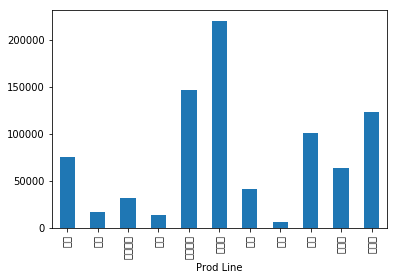

In [5]:
#小結: 哪一種prod line能夠給公司賺最多錢 ?

prod_line_gross.plot(kind="bar")

#可以得知濾水器的總利潤最高，再來是沐浴用品、防曬油
#公司可以多宣傳濾水器

In [6]:
#計算各客層總數(要先groupby顧客代號，才不會有重複的顧客資料

file_temp = file.iloc[:,[3,4,19,20]]
guest_age_interval=file_temp.groupby(by=["客層","客戶代號"])
guest_age_interval.sum()

#客群數量分別為
#20歲以下:14
#20-30歲:24
#30-40歲:10
#40-50歲:28
#50-60歲:26
#60歲以上:1
#40-50歲客群最多，60歲以上最少

毛利    amount
客層     客戶代號                    
20-30歲 1002   2820.19   5162.19
       1004   6508.13  11333.13
       1012   2037.70   4610.70
       1018   3284.68   5611.68
       1022   4768.56  16488.56
       1039  12836.04  25672.04
       1040   2409.60   6649.60
       1041  18793.89  44090.89
       1042   8090.94  25268.94
       1043   4084.35   6828.35
       1044   3875.50   7193.50
       1045  12203.60  33927.60
       1055  13064.72  25956.72
       1056  21661.07  47564.07
       1057  14595.66  27753.66
       1058   7746.23  17429.23
       1083   3545.28   7708.28
       1085  13610.69  26058.69
       1092   7784.95  23646.95
       1093   6637.91  16614.91
       1111   6816.44  14260.44
       1112   4886.84  12900.84
       1113   5840.95   9174.95
       1118   3787.04   9235.04
20歲以下  1001   7806.63  19801.63
       1005  11921.46  25418.46
       1009  11850.72  27276.72
       1011   5889.89  14972.89
       1026   3333.84   8790.84
       1073   1463.53   4750.53
       1074   6351.27  22396.27
       1098  10016.51  21465.51
       1119   4293.10  15431.10
       1120  29217.46  53837.46
       1121   7262.90  24416.90
       1122   4718.62  10111.62
       1131   1046.94   2288.94
       1149   3913.21   7876.21
30-40歲 1006   3129.52   5268.52
       1007   2238.90   4010.90
       1008  15516.56  47223.56
       1059   4791.64   8407.64
       1062  18418.09  45021.09
       1065   4826.43   9137.43
       1066   8952.61  27365.61
       1071   6373.67  17619.67
       1072   4461.68   8088.68
       1132   4410.20  10548.20
40-50歲 1015  14331.72  35773.72
       1019  17906.15  33678.15
       1020   9946.34  26662.34
       1025   3735.57  14066.57
       1032   2824.18   4886.18
       1033   6430.89  10629.89
       1048  12858.22  26011.22
       1054  14339.66  31243.66
       1063   7816.27  25859.27
       1064   4757.42  13930.42
       1067  11041.95  20893.95
       1069   6599.33  12481.33
       1080   9527.31  17390.31
       1081   5559.71   8705.71
       1087   4105.53   7279.53
       1089   3898.24   9246.24
       1090   6911.90  17527.90
       1095  13802.91  28771.91
       1096  11407.60  18247.60
       1097   7636.03  22758.03
       1101   3134.94   9628.94
       1102  19643.17  60726.17
       1107   3247.58   5666.58
       1108   6004.16  12269.16
       1127  10865.28  20555.28
       1128  17735.64  37979.64
       1129   6346.09  12373.09
       1130  21143.00  53191.00
50-60歲 1024   4289.67   9140.67
       1028  13456.15  20490.15
       1030  11541.35  27212.35
       1035   4316.05   7320.05
       1036  10592.69  29803.69
       1037  10875.73  19890.73
       1038  22126.45  55713.45
       1051   7707.26  17252.26
       1052   1806.44   4206.44
       1053  10889.66  26818.66
       1075   4698.79  11553.79
       1076   4137.29  12023.29
       1077   1331.14   2576.14
       1078   3095.28  10145.28
       1104   2112.51   4960.51
       1105   7297.36  13477.36
       1106  27604.61  43353.61
       1135   6099.10  11904.10
       1136   9594.14  18561.14
       1137   2443.20  13935.20
       1138   8556.92  23103.92
       1139   4428.69   8014.69
       1144   8771.62  18102.62
       1145    894.08   3391.08
       1147   4153.85   7639.85
       1148   6948.38  22454.38
60歲以上  1109   2489.90   4853.90

In [7]:
#計算各客層所帶來的毛利總和&amount總和
file_temp2= file.iloc[:,[4,19,20]]
guest1=file_temp2.groupby(by="客層")
guest1.sum()


,毛利,amount
客層,,
20-30歲,191690.96,431140.96
20歲以下,109086.08,258835.08
30-40歲,73119.30,182691.30
40-50歲,263556.79,598433.79
50-60歲,199768.41,443045.41
60歲以上,2489.90,4853.90


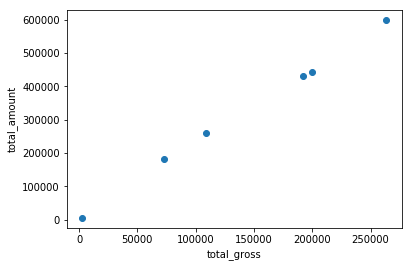

In [8]:
#小節:哪一個客層更容易給公司賺錢、消費力最高?

#40-50歲總消費力最高，再來是50-60歲、20-30歲

guest_interval_dic = {
    "total_gross":guest1["毛利"].sum(),
    "total_amount": guest1["amount"].sum()

    
}
guest_interval_df = pd.DataFrame(guest_interval_dic)
guest_interval_df
plt.scatter(x=guest_interval_df["total_gross"],y=guest_interval_df["total_amount"])
plt.xlabel("total_gross")
plt.ylabel("total_amount")
plt.show()

In [9]:
#計算各地點的毛利總和&amount總和
file_temp3= file.iloc[:,[9,19,20]]
country1=file_temp3.groupby(by="Country")
country1.sum()

,毛利,amount
Country,,
台中營一部,24115.06,60718.06
台中營三部,49953.40,118747.40
台中營二部,53041.37,120111.37
台中營四部,55068.74,110775.74
台南營一部,72142.62,148386.62
台南營三部,15361.25,46292.25
台南營二部,24307.98,59993.98
台南營四部,20308.20,55631.20
高雄營一部,38035.10,93125.10


In [10]:
#小結:哪一個地區所得到的銷售量最高? 得到的毛利最高? 

In [11]:
#查看毛利<0的資料

minus_gross=file[file["毛利"]<0]
minus_gross

#毛利<0的都是西裝

,訂單號碼,業務員代號,業務員,客戶代號,客層,客戶姓名,Order Dt,Closed Dt,Status,Country,Channel,Prod Type,Prod Line,Product,Prod No,Price,Qty,Disc Prcnt,Prod Cost,毛利,amount,月份
440,34,30,Lee Chan,1036,50-60歲,Ultra Sports 2,2005/5/3,2002/5/9,C,台南營三部,直接銷售,男裝,西裝,Star Lite,40100,165,18,23,130,-53.10,2286.90,5
815,73,5,Dave Mustaine,1015,40-50歲,Desert Duds & Tees 8,2005/11/20,2002/11/28,C,高雄營五部,禮券,男裝,西裝,Star Gazer-2,40101,518,1,48,343,-73.64,269.36,11
844,192,5,Dave Mustaine,1020,40-50歲,Pro Form Supplies 5,2006/12/5,2003/12/10,C,高雄營五部,提貨券,男裝,西裝,Star Gazer-3,40102,500,19,48,370,-2090.00,4940.00,12
930,133,5,Dave Mustaine,1075,50-60歲,Act'N'Up Fitness 1,2006/2/17,2003/2/26,C,高雄營五部,禮券,男裝,西裝,Star Gazer-3,40102,500,7,48,370,-770.00,1820.00,2
991,57,5,Dave Mustaine,1102,40-50歲,Pro Form Supplies 4,2005/10/25,2002/11/3,C,高雄營五部,禮券,男裝,西裝,Star Gazer-2,40101,518,2,48,343,-147.28,538.72,10
992,57,5,Dave Mustaine,1102,40-50歲,Pro Form Supplies 4,2005/10/25,2002/11/3,C,高雄營五部,禮券,男裝,西裝,StarDome,40103,615,10,48,410,-902.00,3198.00,10
997,79,5,Dave Mustaine,1102,40-50歲,Pro Form Supplies 4,2005/8/20,2002/8/31,C,高雄營五部,直接銷售,男裝,西裝,Star Gazer-2,40101,518,7,48,343,-515.48,1885.52,8
998,79,5,Dave Mustaine,1102,40-50歲,Pro Form Supplies 4,2005/8/20,2002/8/31,C,高雄營五部,直接銷售,男裝,西裝,StarDome,40103,615,3,48,410,-270.60,959.40,8
1008,126,23,Tony Armarillo,1102,40-50歲,Pro Form Supplies 4,2006/7/3,2003/7/4,C,高雄營五部,禮券,男裝,西裝,Star Gazer-3,40102,375,10,20,370,-700.00,3000.00,7
1048,184,3,Gus Grovlin,1109,60歲以上,Miami,2006/3/2,2003/3/13,C,高雄營五部,禮券,男裝,西裝,Star Gazer-2,40101,466,1,40,343,-63.40,279.60,3


In [12]:
#Decision Tree

In [13]:
# 使用 "客層","Channel","Prod Type" 來預測目標："Prod Line"

In [14]:
# 將"客層"轉換為數值型態變數
for i in range(0,1122):
    if file_c.loc[i,"客層"] == '20歲以下':
        file.loc[i,"客層"] = 0
    elif file_c.loc[i,"客層"] == '20-30歲':
        file.loc[i,"客層"] = 1
    elif file_c.loc[i,"客層"] == '30-40歲':
        file.loc[i,"客層"] = 2
    elif file_c.loc[i,"客層"] == '40-50歲':
        file.loc[i,"客層"] = 3
    elif file_c.loc[i,"客層"] == '50-60歲':
        file.loc[i,"客層"] = 4
    else:
        file.loc[i,"客層"] = 5

In [15]:
# 將"Channel"轉換為數值型態變數
for i in range(0,1122):
    if file_c.loc[i,"Channel"] == '直接銷售':
        file.loc[i,"Channel"] = 0
    elif file_c.loc[i,"Channel"] == '提貨券':
        file.loc[i,"Channel"] = 1
    else:
        file.loc[i,"Channel"] = 2

In [16]:
# 將"Prod Type"轉換為數值型態變數
for i in range(0,1122):
    if file_c.loc[i,"Prod Type"] == '男裝':
        file.loc[i,"Prod Type"] = 0
    elif file_c.loc[i,"Prod Type"] == '女裝':
        file.loc[i,"Prod Type"] = 1
    else:
        file.loc[i,"Prod Type"] = 2

In [17]:
# 檢視修改後的資料
file.head(25)

,訂單號碼,業務員代號,業務員,客戶代號,客層,客戶姓名,Order Dt,Closed Dt,Status,Country,Channel,Prod Type,Prod Line,Product,Prod No,Price,Qty,Disc Prcnt,Prod Cost,毛利,amount,月份
0,111,34,Kaley Gregson,1007,2,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,0,0,西裝,StarDome,40103,554,1,19,410,38.74,448.74,8
1,111,34,Kaley Gregson,1007,2,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,0,0,褲子,運動褲,40303,25,25,8,16,175.00,575.00,8
2,111,34,Kaley Gregson,1007,2,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,0,1,內褲,GO Water Bottle,50203,8,32,14,4,92.16,220.16,8
3,111,34,Kaley Gregson,1007,2,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,0,2,再生用品,EnviroSak,60200,7,16,1,2,78.88,110.88,8
4,111,34,Kaley Gregson,1007,2,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,0,2,再生用品,Enviro-Kit,60201,13,19,24,4,111.72,187.72,8
5,111,34,Kaley Gregson,1007,2,Backwoods Equipment Pty,2006/8/13,2003/8/18,C,台南營一部,0,2,沐浴用品,RiverKind Detergent,60302,8,363,15,2,1742.40,2468.40,8
6,65,33,Torey Wandiko,1039,1,Vacation Central 1,2005/9/23,2002/9/28,C,台南營一部,0,0,西裝,Star Lite,40100,165,15,12,130,228.00,2178.00,9
7,65,33,Torey Wandiko,1039,1,Vacation Central 1,2005/9/23,2002/9/28,C,台南營一部,0,0,褲子,短褲,40302,18,22,19,12,56.76,320.76,9
8,65,33,Torey Wandiko,1039,1,Vacation Central 1,2005/9/23,2002/9/28,C,台南營一部,0,0,男鞋,皮鞋,40401,111,13,6,74,394.42,1356.42,9
9,65,33,Torey Wandiko,1039,1,Vacation Central 1,2005/9/23,2002/9/28,C,台南營一部,0,1,內褲,GO Water Bottle,50203,8,64,24,4,133.12,389.12,9


In [18]:
# 切割訓練資料與測試資料 (0.7 Training / 0.3 Testing)
x_train,x_test,y_train,y_test = train_test_split(file[["客層","Channel","Prod Type"]],file["Prod Line"],test_size = 0.3,random_state = 0)


In [19]:
# 建構 Decision Tree
tree1 = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
tree1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
# 模型預測
predictions = tree1.predict(x_test)
print(predictions)

['再生用品' '濾水器' '內褲' '西裝' '內褲' '沐浴用品' '防曬油' '再生用品' '內衣' '沐浴用品' '防曬油' '防曬油'
 '再生用品' '西裝' '男鞋' '濾水器' '西裝' '西裝' '沐浴用品' '帽子' '內褲' '再生用品' '防曬油' '再生用品'
 '防曬油' '沐浴用品' '內褲' '內褲' '沐浴用品' '再生用品' '內衣' '西裝' '再生用品' '西裝' '西裝' '西裝' '內褲'
 '再生用品' '再生用品' '西裝' '再生用品' '西裝' '防曬油' '防曬油' '西裝' '再生用品' '內衣' '防曬油' '西裝'
 '西裝' '內褲' '西裝' '西裝' '再生用品' '西裝' '西裝' '男鞋' '西裝' '西裝' '內衣' '西裝' '防曬油' '帽子'
 '再生用品' '再生用品' '內衣' '褲子' '西裝' '西裝' '西裝' '內衣' '防曬油' '內衣' '西裝' '帽子' '西裝'
 '西裝' '沐浴用品' '西裝' '西裝' '內褲' '沐浴用品' '西裝' '內衣' '西裝' '沐浴用品' '內衣' '內衣' '內衣'
 '防曬油' '褲子' '沐浴用品' '沐浴用品' '防曬油' '再生用品' '西裝' '西裝' '西裝' '內衣' '沐浴用品' '內褲'
 '內衣' '濾水器' '再生用品' '沐浴用品' '內褲' '西裝' '男鞋' '內衣' '警報器' '西裝' '西裝' '西裝' '內褲'
 '內衣' '帽子' '防曬油' '內褲' '再生用品' '褲子' '西裝' '男鞋' '沐浴用品' '內褲' '西裝' '再生用品' '內衣'
 '西裝' '內衣' '男鞋' '內衣' '濾水器' '西裝' '內衣' '內衣' '防曬油' '沐浴用品' '再生用品' '防曬油' '西裝'
 '防曬油' '警報器' '再生用品' '防曬油' '沐浴用品' '沐浴用品' '西裝' '沐浴用品' '內褲' '再生用品' '沐浴用品'
 '西裝' '再生用品' '內褲' '再生用品' '西裝' '西裝' '西裝' '西裝' '濾水器' '男鞋' '西裝' '再生用品' '西裝'
 '內褲' '再生用品' '西裝' '內衣' '西裝' '再生用品' '西裝' '內褲' '褲子' '沐浴用品' '內

In [21]:
# 比對預測與真實結果
y_test.values

array(['警報器', '防曬油', '內衣', '男鞋', '內衣', '濾水器', '防曬油', '濾水器', '內衣', '濾水器',
       '警報器', '警報器', '濾水器', '西裝', '褲子', '防曬油', '男鞋', '褲子', '濾水器', '西裝',
       '內褲', '防曬油', '再生用品', '沐浴用品', '再生用品', '防曬油', '內褲', '內褲', '警報器',
       '警報器', '內褲', '褲子', '再生用品', '帽子', '男鞋', '西裝', '內衣', '再生用品', '濾水器',
       '西裝', '濾水器', '男鞋', '防曬油', '再生用品', '西裝', '沐浴用品', '內褲', '防曬油', '西裝',
       '西裝', '內衣', '西裝', '西裝', '再生用品', '西裝', '男鞋', '西裝', '褲子', '西裝', '內衣',
       '帽子', '沐浴用品', '西裝', '防曬油', '防曬油', '內褲', '西裝', '西裝', '西裝', '帽子',
       '內衣', '警報器', '內衣', '西裝', '西裝', '男鞋', '褲子', '濾水器', '西裝', '帽子', '內褲',
       '警報器', '西裝', '內褲', '褲子', '警報器', '內衣', '內褲', '內褲', '再生用品', '西裝',
       '濾水器', '濾水器', '再生用品', '警報器', '男鞋', '西裝', '褲子', '內衣', '濾水器', '內衣',
       '內褲', '警報器', '防曬油', '防曬油', '內褲', '西裝', '男鞋', '內衣', '濾水器', '褲子',
       '西裝', '褲子', '內衣', '內褲', '西裝', '再生用品', '內衣', '警報器', '西裝', '帽子',
       '褲子', '再生用品', '內衣', '褲子', '防曬油', '內衣', '褲子', '內衣', '褲子', '內褲',
       '再生用品', '褲子', '內衣', '內衣', '再生用品', '防曬油', '沐浴用品', '防曬油',

In [22]:
# 計算模型正確率
tree1.score(x_test,y_test)

0.28486646884273

In [23]:
# 評估決策樹模型
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          內衣       0.49      0.57      0.52        30
          內褲       0.48      0.40      0.44        30
        再生用品       0.23      0.31      0.27        32
          帽子       0.18      0.11      0.14        18
        沐浴用品       0.12      0.23      0.16        22
         濾水器       0.00      0.00      0.00        30
          男鞋       0.07      0.04      0.05        25
          褲子       0.10      0.03      0.04        38
          西裝       0.38      0.69      0.49        58
         警報器       0.25      0.04      0.06        27
         防曬油       0.19      0.26      0.22        27

   micro avg       0.28      0.28      0.28       337
   macro avg       0.23      0.24      0.22       337
weighted avg       0.24      0.28      0.25       337



In [24]:
# 評估決策樹模型(Confusion Matrix)
cm=confusion_matrix(y_test,predictions)
print(confusion_matrix(y_test,predictions))


[[17 13  0  0  0  0  0  0  0  0  0]
 [18 12  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  8  3  0  0  0  0 11]
 [ 0  0  0  2  0  0  2  1 13  0  0]
 [ 0  0  6  0  5  4  0  0  0  1  6]
 [ 0  0 11  0 12  0  0  0  0  2  5]
 [ 0  0  0  2  0  0  1  3 19  0  0]
 [ 0  0  0  0  0  0  5  1 32  0  0]
 [ 0  0  0  7  0  0  6  5 40  0  0]
 [ 0  0  7  0  8  4  0  0  0  1  7]
 [ 0  0  9  0  7  4  0  0  0  0  7]]


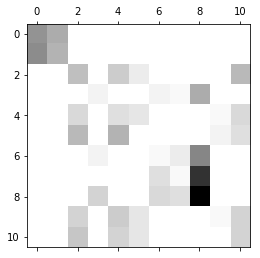

In [25]:
#將confusion matrix視覺化
plt.matshow(cm, cmap='binary')

In [26]:
#建構第二棵樹，以不同的train and test比率

In [27]:
# 切割訓練資料與測試資料 (0.5 Training / 0.5 Testing)
x_train2,x_test2,y_train2,y_test2 = train_test_split(file[["客層","Channel","Prod Type"]],file["Prod Line"],test_size = 0.5,random_state = 0)

In [28]:
# 建構 Decision Tree2
tree2= DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
tree2.fit(x_train2,y_train2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [29]:
# 模型預測2
predictions2 = tree2.predict(x_test2)
print(predictions2)

['再生用品' '濾水器' '內衣' '西裝' '內褲' '沐浴用品' '沐浴用品' '再生用品' '內衣' '沐浴用品' '防曬油' '沐浴用品'
 '再生用品' '西裝' '男鞋' '防曬油' '西裝' '西裝' '沐浴用品' '帽子' '內褲' '再生用品' '沐浴用品' '再生用品'
 '沐浴用品' '沐浴用品' '內褲' '內褲' '沐浴用品' '再生用品' '內衣' '西裝' '再生用品' '西裝' '西裝' '西裝'
 '內褲' '再生用品' '再生用品' '西裝' '再生用品' '西裝' '沐浴用品' '沐浴用品' '西裝' '再生用品' '內衣' '沐浴用品'
 '西裝' '西裝' '內褲' '西裝' '西裝' '再生用品' '西裝' '西裝' '西裝' '西裝' '西裝' '內衣' '西裝' '沐浴用品'
 '帽子' '再生用品' '再生用品' '內衣' '褲子' '男鞋' '西裝' '西裝' '內衣' '防曬油' '內褲' '西裝' '帽子'
 '西裝' '西裝' '再生用品' '西裝' '西裝' '內褲' '沐浴用品' '西裝' '內衣' '西裝' '沐浴用品' '內衣' '內衣'
 '內衣' '沐浴用品' '褲子' '再生用品' '再生用品' '沐浴用品' '再生用品' '西裝' '西裝' '男鞋' '內衣' '沐浴用品'
 '內褲' '內衣' '再生用品' '再生用品' '沐浴用品' '內褲' '西裝' '西裝' '內衣' '濾水器' '西裝' '西裝' '西裝'
 '內褲' '內衣' '帽子' '沐浴用品' '內褲' '再生用品' '褲子' '西裝' '男鞋' '再生用品' '內褲' '西裝' '再生用品'
 '內衣' '西裝' '內褲' '西裝' '內衣' '再生用品' '西裝' '內衣' '內衣' '防曬油' '沐浴用品' '再生用品' '沐浴用品'
 '西裝' '沐浴用品' '濾水器' '再生用品' '防曬油' '再生用品' '沐浴用品' '男鞋' '沐浴用品' '內褲' '再生用品'
 '沐浴用品' '西裝' '再生用品' '內褲' '再生用品' '西裝' '西裝' '男鞋' '男鞋' '再生用品' '男鞋' '西裝'
 '再生用品' '西裝' '內褲' '再生用品' '西裝' '內衣' '西裝' '再生用品' '西裝' '內褲

In [30]:
# 比對預測與真實結果2
y_test2.values

array(['警報器', '防曬油', '內衣', '男鞋', '內衣', '濾水器', '防曬油', '濾水器', '內衣', '濾水器',
       '警報器', '警報器', '濾水器', '西裝', '褲子', '防曬油', '男鞋', '褲子', '濾水器', '西裝',
       '內褲', '防曬油', '再生用品', '沐浴用品', '再生用品', '防曬油', '內褲', '內褲', '警報器',
       '警報器', '內褲', '褲子', '再生用品', '帽子', '男鞋', '西裝', '內衣', '再生用品', '濾水器',
       '西裝', '濾水器', '男鞋', '防曬油', '再生用品', '西裝', '沐浴用品', '內褲', '防曬油', '西裝',
       '西裝', '內衣', '西裝', '西裝', '再生用品', '西裝', '男鞋', '西裝', '褲子', '西裝', '內衣',
       '帽子', '沐浴用品', '西裝', '防曬油', '防曬油', '內褲', '西裝', '西裝', '西裝', '帽子',
       '內衣', '警報器', '內衣', '西裝', '西裝', '男鞋', '褲子', '濾水器', '西裝', '帽子', '內褲',
       '警報器', '西裝', '內褲', '褲子', '警報器', '內衣', '內褲', '內褲', '再生用品', '西裝',
       '濾水器', '濾水器', '再生用品', '警報器', '男鞋', '西裝', '褲子', '內衣', '濾水器', '內衣',
       '內褲', '警報器', '防曬油', '防曬油', '內褲', '西裝', '男鞋', '內衣', '濾水器', '褲子',
       '西裝', '褲子', '內衣', '內褲', '西裝', '再生用品', '內衣', '警報器', '西裝', '帽子',
       '褲子', '再生用品', '內衣', '褲子', '防曬油', '內衣', '褲子', '內衣', '褲子', '內褲',
       '再生用品', '褲子', '內衣', '內衣', '再生用品', '防曬油', '沐浴用品', '防曬油',

In [31]:
# 計算模型正確率2
tree2.score(x_test2,y_test2)

0.31194295900178254

In [32]:
# 評估決策樹模型2
print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

          內衣       0.59      0.63      0.61        59
          內褲       0.49      0.45      0.47        47
        再生用品       0.21      0.50      0.30        50
          帽子       0.15      0.06      0.09        32
        沐浴用品       0.19      0.34      0.24        44
         濾水器       0.15      0.05      0.07        41
          男鞋       0.10      0.07      0.08        45
          褲子       0.17      0.06      0.09        48
          西裝       0.39      0.66      0.49        92
         警報器       0.00      0.00      0.00        51
         防曬油       0.21      0.12      0.15        52

   micro avg       0.31      0.31      0.31       561
   macro avg       0.24      0.27      0.24       561
weighted avg       0.26      0.31      0.27       561



C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
# 評估決策樹模型(Confusion Matrix)
cm2=confusion_matrix(y_test2,predictions2)
print(confusion_matrix(y_test2,predictions2))


[[37 22  0  0  0  0  0  0  0  0  0]
 [26 21  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0 17  0  0  0  0  0  8]
 [ 0  0  0  2  0  0  4  2 24  0  0]
 [ 0  0 21  0 15  3  0  0  0  0  5]
 [ 0  0 20  0 15  2  0  0  0  0  4]
 [ 0  0  0  2  0  0  3  6 34  0  0]
 [ 0  0  0  0  0  0  9  3 36  0  0]
 [ 0  0  0  9  0  0 15  7 61  0  0]
 [ 0  0 28  0 14  4  0  0  0  0  5]
 [ 0  0 24  0 18  4  0  0  0  0  6]]


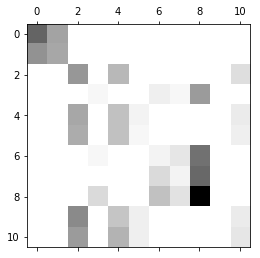

In [34]:
#將confusion matrix 視覺化
plt.matshow(cm2, cmap='binary')

In [45]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os

os.environ["PATH"] += os.pathsep + 'Users\jaing\Downloads\release\bin'
feature_cols=["客層","Channel","Prod Type"]
class_name=["內衣","內褲","再生用品","帽子","沐浴用品","濾水器","男鞋","褲子","西裝","警報器","防曬油"]

dot_data = StringIO()
export_graphviz(tree1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names = class_name)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found